**МЕТОД ГЛАВНЫХ КОМПОНЕНТ. ИСПОЛЬЗОВАНИЕ МГК ДЛЯ УСТРАНЕНИЯ МУЛЬТИКОЛЛИНЕАРНОСТИ**

Вариант 1

In [359]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data.csv', sep=',', decimal=',')
df.drop(['Y2', 'Y3'], axis=1, inplace=True)
df.head(5)

,Y1,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
0,9.26,0.23,0.78,0.40,1.37,1.23,0.23,1.45,26006,167.69,47750,6.40,166.32,10.08,17.72
1,9.38,0.24,0.75,0.26,1.49,1.04,0.39,1.30,23935,186.10,50391,7.80,92.88,14.76,18.39
2,12.11,0.19,0.68,0.40,1.44,1.80,0.43,1.37,22589,220.45,43149,9.76,158.04,6.48,26.46
3,10.81,0.17,0.70,0.50,1.42,0.43,0.18,1.65,21220,169.30,41089,7.90,93.96,21.96,22.37
4,9.35,0.23,0.62,0.40,1.35,0.88,0.15,1.91,7394,39.53,14257,5.35,173.88,11.88,28.13


In [360]:
Y = df.loc[:, 'Y1']
X = df.drop('Y1', axis=1)

1. Для выбранных в соответствии с вариантом задания определяющих показателей (Y1, X1 – X14) перейти от пространства исходных факторов к пространству главных
компонент.

a) Найти собственные значения и собственные векторы выборочной матрицы
ковариаций, упорядоченные по убыванию собственных значений. Оценить долю
общей дисперсии объясняемой каждой главной компонентой и совокупностью
главных компонент (двух, трех и т.д.).

In [361]:
# Нормируем признаки
scaler = StandardScaler()
X = scaler.fit_transform(X)
pd.DataFrame(X, columns=scaler.get_feature_names_out()).head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
0,-0.693444,0.844604,0.643130,0.220404,0.207189,-0.750303,-0.188271,1.151325,0.828690,1.049593,0.182534,1.643171,-0.513345,-0.398611
1,-0.597734,0.275570,-0.267562,1.075143,-0.075520,-0.281087,-0.559673,0.940283,1.029905,1.186671,0.775531,-0.458578,0.346296,-0.254572
2,-1.076282,-1.052176,0.643130,0.719002,1.055314,-0.163783,-0.386352,0.803121,1.405339,0.810783,1.605726,1.406209,-1.174607,1.480341
3,-1.267702,-0.672820,1.293625,0.576545,-0.983163,-0.896933,0.306933,0.663616,0.846286,0.703861,0.817888,-0.427670,1.668821,0.601060
4,-0.693444,-2.190245,0.643130,0.077948,-0.313590,-0.984911,0.950697,-0.745300,-0.572057,-0.688826,-0.262213,1.859528,-0.182714,1.839363


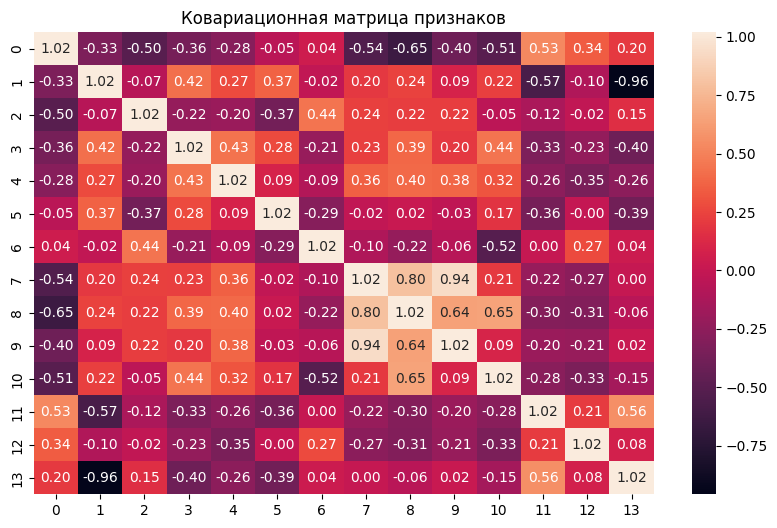

In [362]:
# Найдем ковариационную матрицу
A = np.cov(X, rowvar=False)
plt.figure(figsize=(10, 6))
sns.heatmap(A, annot=True, fmt='.2f')
plt.title('Ковариационная матрица признаков')
plt.show()

Как видно из корреляционной матрицы, в данных явно выражена проблема мультиколлинеарности.

In [363]:
# Найдем собственные векторы и собственные значения
eigh_vals, eigh_vecs = np.linalg.eigh(A)
eigh_tuples = list(zip(eigh_vals, eigh_vecs.T))

# Сортировка по убыванию собственных значений
eigh_tuples.sort(key=lambda x: x[0], reverse=True)

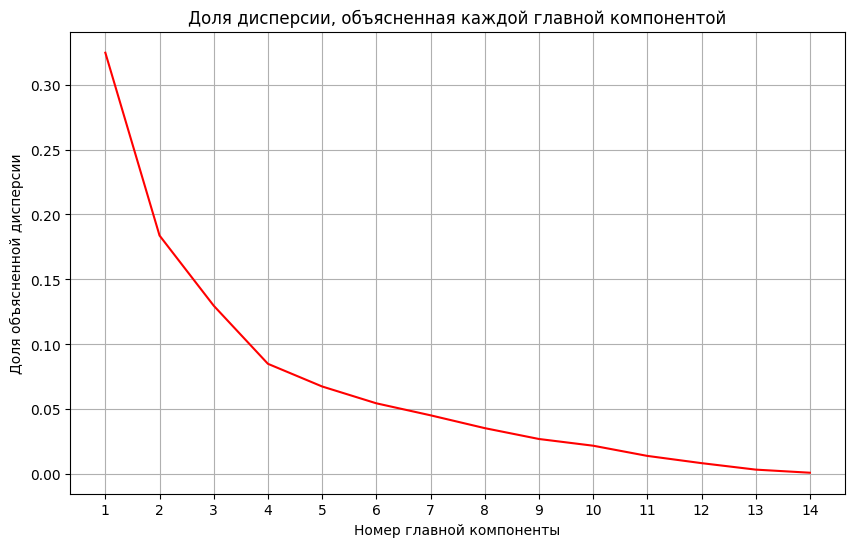

In [364]:
# Доля дисперсии, объясняемая каждой главной компонентой
sorted_eigh_vals = sorted(eigh_vals, reverse=True)
prop_dct = {num+1: sorted_eigh_vals[num]/sum(sorted_eigh_vals) for num in range(len(sorted_eigh_vals))}

plt.figure(figsize=(10, 6))
sns.lineplot(prop_dct, color='red')
plt.title('Доля дисперсии, объясненная каждой главной компонентой')
plt.xticks(range(1, 15))
plt.xlabel('Номер главной компоненты')
plt.ylabel('Доля объясненной дисперсии')
plt.grid()
plt.show()

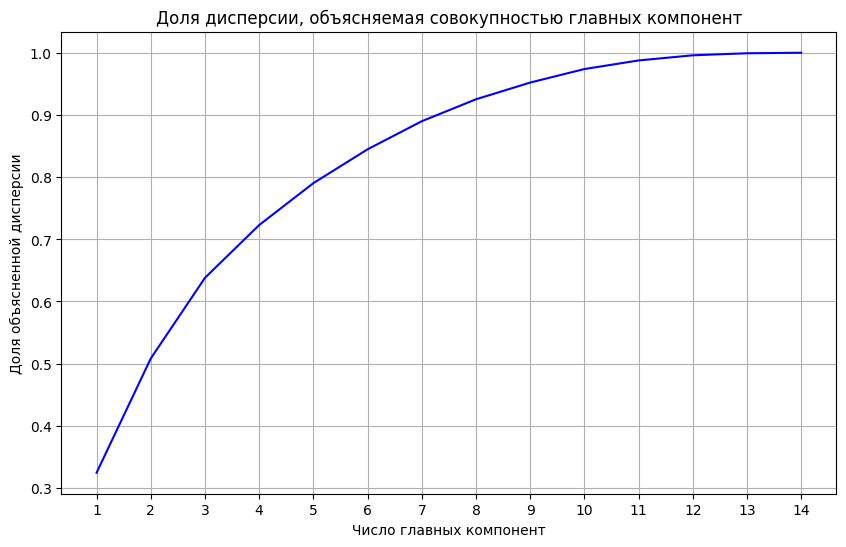

In [365]:
# Доля дисперсии, объясняемая совокупностью главных компонент
cumulative_prop_dct = {num+1: sum(sorted_eigh_vals[:num+1])/sum(sorted_eigh_vals) for num in range(14)}

plt.figure(figsize=(10, 6))
sns.lineplot(cumulative_prop_dct, color='blue')
plt.title('Доля дисперсии, объясняемая совокупностью главных компонент')
plt.xticks(range(1, 15))
plt.xlabel('Число главных компонент')
plt.ylabel('Доля объясненной дисперсии')
plt.grid()
plt.show()

b) Определить количество значимых главных компонент, ориентируясь на: долю
выделенной дисперсии, критерий Кайзера, правило сломанной трости, критерий
Кэттелла (каменистой осыпи).

In [366]:
# Доля выделенной дисперсии (0.75)
num = 1
while sum(sorted_eigh_vals[:num+1])/sum(sorted_eigh_vals) < 0.75:
  num += 1
print(f'Число компонент: {num}')
print(f'Доля объясненной дисперсии: {sum(sorted_eigh_vals[:num+1])/sum(sorted_eigh_vals)}')

Число компонент: 4
Доля объясненной дисперсии: 0.7902898980158132


In [367]:
# Критерий Кайзера
num = int(sum(np.array(sorted_eigh_vals) > 1))
print(f'Число компонент: {num}')
print(f'Доля объясненной дисперсии: {sum(sorted_eigh_vals[:num+1])/sum(sorted_eigh_vals)}')

Число компонент: 4
Доля объясненной дисперсии: 0.7902898980158132


In [368]:
# Правило сломанной трости
k = len(sorted_eigh_vals)
segments_expectations = [(1/k)*sum([(1/j) for j in range(i, k+1)]) for i in range(1, k+1)]
print('МО длин отрезков:')
print(*segments_expectations, sep='\n', end='\n\n')
print(f'Сумма МО длин отрезков = {round(sum(segments_expectations), 2)}')

МО длин отрезков:
0.232254451897309
0.16082588046873758
0.12511159475445188
0.10130207094492809
0.08344492808778524
0.06915921380207095
0.05725445189730903
0.04705037026465598
0.03812179883608455
0.030185290899576615
0.02304243375671947
0.016548927263212977
0.010596546310832025
0.00510204081632653

Сумма МО длин отрезков = 1.0


In [369]:
broken_stick_components = []
norm_sorted_eigh_vals = sorted_eigh_vals / sum(sorted_eigh_vals)
for i in range(len(norm_sorted_eigh_vals)):
  if norm_sorted_eigh_vals[i] > segments_expectations[i]:
    broken_stick_components.append(sorted_eigh_vals[i])

num = len(broken_stick_components)
print(f'Число компонент: {num}')
print(f'Доля объясненной дисперсии: {sum(broken_stick_components)/sum(sorted_eigh_vals)}')

Число компонент: 3
Доля объясненной дисперсии: 0.6380723180875665


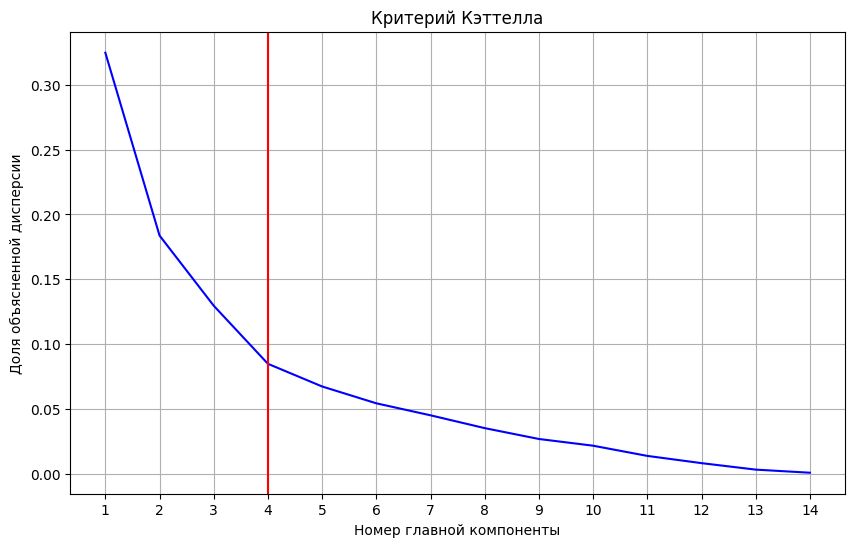

In [370]:
# Критерий Кэттелла
plt.figure(figsize=(10, 6))
sns.lineplot(prop_dct, color='blue')
plt.axvline(4, color='red')
plt.title('Критерий Кэттелла')
plt.xticks(range(1, 15))
plt.xlabel('Номер главной компоненты')
plt.ylabel('Доля объясненной дисперсии')
plt.grid()
plt.show()

В результате, оставляем 4 значимых главных компоненты.

c) Записать выражения для значимых главных компонент через исходные признаки
(выписать в явном виде линейные комбинации, определяющие компоненты), а также
получить оценки векторов значений значимых главных компонент по всем
наблюдениям.

In [371]:
for j in range(4):
  eigh_vec = eigh_tuples[j][1]
  eigh_vec_str = [f'({round(eigh_vec[i], 2)})*X{i+1}' for i in range(len(eigh_vec))]
  print(f'Z{j+1} = ', end='')
  print(*eigh_vec_str, sep=' + ')

Z1 = (-0.35)*X1 + (0.28)*X2 + (0.04)*X3 + (0.29)*X4 + (0.27)*X5 + (0.13)*X6 + (-0.13)*X7 + (0.33)*X8 + (0.38)*X9 + (0.28)*X10 + (0.3)*X11 + (-0.29)*X12 + (-0.22)*X13 + (-0.23)*X14
Z2 = (-0.18)*X1 + (-0.34)*X2 + (0.39)*X3 + (-0.19)*X4 + (-0.03)*X5 + (-0.38)*X6 + (0.14)*X7 + (0.34)*X8 + (0.25)*X9 + (0.34)*X10 + (-0.04)*X11 + (0.18)*X12 + (-0.06)*X13 + (0.42)*X14
Z3 = (-0.18)*X1 + (0.32)*X2 + (0.43)*X3 + (-0.11)*X4 + (-0.13)*X5 + (-0.07)*X6 + (0.55)*X7 + (-0.01)*X8 + (-0.11)*X9 + (-0.0)*X10 + (-0.31)*X11 + (-0.3)*X12 + (0.2)*X13 + (-0.31)*X14
Z4 = (0.35)*X1 + (0.08)*X2 + (-0.36)*X3 + (0.04)*X4 + (0.3)*X5 + (0.11)*X6 + (0.14)*X7 + (0.35)*X8 + (-0.03)*X9 + (0.46)*X10 + (-0.46)*X11 + (0.14)*X12 + (0.21)*X13 + (-0.08)*X14


In [372]:
# Оценки векторов значений значимых главных компонент по всем наблюдениям
B = np.array([eigh_tuples[j][1] for j in range(4)]).T
Z_df = pd.DataFrame(X @ B, columns=['Z1', 'Z2', 'Z3', 'Z4'])
Z_df

,Z1,Z2,Z3,Z4
0,1.305986,1.382909,-0.059679,0.489636
1,1.982022,0.468257,-0.385170,0.335226
2,1.640117,2.416736,-2.061705,-0.711499
3,0.641888,1.966077,0.801510,-0.885325
4,-2.322031,2.117365,-0.705822,-1.076178
5,-0.768626,-0.795406,-0.862914,-0.228509
6,0.363241,1.398775,0.549836,1.608738
7,-0.655561,0.634336,0.936180,-0.777399
8,-2.935611,0.909569,-0.608680,1.188384
9,-2.869719,0.456328,1.751092,0.724836


d) Определить какие признаки вносят наибольший вклад в каждую значимую главную
компоненту и, соответственно, долю этого вклада в компоненту.

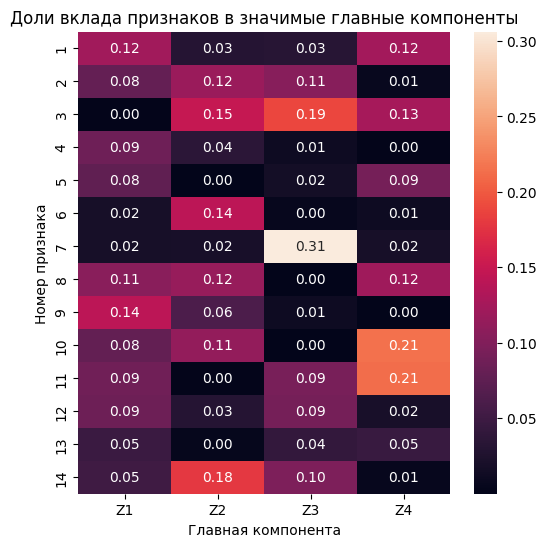

In [373]:
# Квадраты коэффициентов
B_squared = pd.DataFrame(B**2, columns=[f'Z{i+1}' for i in range(4)], index=[i+1 for i in range(B.shape[0])])

plt.figure(figsize=(6, 6))
sns.heatmap(B_squared, annot=True, fmt='.2f')
plt.title('Доли вклада признаков в значимые главные компоненты')
plt.ylabel('Номер признака')
plt.xlabel('Главная компонента')
plt.show()

2. Построить и сравнить модели множественной линейной регрессии:

a) связывающую результирующий показатель (Y1) и все
главные компоненты, статистически значимо влияющие на результирующий
показатель;

b) связывающую результирующий показатель (Y1) и все
значимые главные компоненты (определенные в пункте 1b), статистически значимо
влияющие на результирующий показатель.

In [374]:
# Пункт a). Перейдем в пространство признаков, включающее все главные компоненты.
# Оценки векторов значений всех главных компонент по всем наблюдениям
B_all = np.array([eigh_tuples[j][1] for j in range(14)]).T
Z_all_df = pd.DataFrame(X @ B_all, columns=[f'Z{i+1}' for i in range(14)])
Z_all_df.head()

,Z1,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9,Z10,Z11,Z12,Z13,Z14
0,1.305986,1.382909,-0.059679,0.489636,0.273056,-0.390866,-1.548685,-0.639374,-1.094512,-0.618927,0.174059,-0.173267,0.012550,0.173214
1,1.982022,0.468257,-0.385170,0.335226,-0.646782,-0.815372,-0.336399,-0.395709,0.713445,0.173726,-0.007848,-0.288710,-0.148025,0.048560
2,1.640117,2.416736,-2.061705,-0.711499,0.614081,-0.594591,0.576177,-0.249507,-1.152540,-0.278309,-0.106042,-0.193896,0.037157,0.147355
3,0.641888,1.966077,0.801510,-0.885325,-1.357823,-1.723803,0.269470,-0.229042,0.878960,-0.104989,-0.033388,-0.341229,-0.106066,-0.157051
4,-2.322031,2.117365,-0.705822,-1.076178,1.017494,-0.692816,1.080405,-0.795849,-0.559330,-0.518956,0.591012,-0.320063,-0.288656,-0.076254


Построим модель множественной линейной регрессии.

Нахождение вектора оценок параметров регрессии:
$$
\hat{B} = K^{-1}Z,
$$

где:

$$
K = X^TX, \quad Z = X^TY,
$$

$$
X =
\begin{pmatrix}
1 & x_1^{(1)} & \cdots & x_k^{(1)} \\
1 & x_1^{(2)} & \cdots & x_k^{(2)} \\
\vdots & \vdots & \ddots & \vdots \\
1 & x_1^{(n)} & \cdots & x_k^{(n)}
\end{pmatrix}
=
\begin{pmatrix}
1 & \varphi_1(x_1) & \cdots & \varphi_k(x_1) \\
1 & \varphi_1(x_2) & \cdots & \varphi_k(x_2) \\
\vdots & \vdots & \ddots & \vdots \\
1 & \varphi_1(x_n) & \cdots & \varphi_k(x_n)
\end{pmatrix}, \quad
Y =
\begin{pmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{pmatrix}
$$

Оценка остаточной дисперсии модели регрессии (несмещенная оценка дисперсии $\sigma^2$):

$$
s^2 = \frac{1}{n - k - 1} \sum_{i=1}^n (y_i - \hat{y}(x_i))^2
$$

Оценка коэффициента детерминации:

$$
\hat{R}^2 = 1 - \frac{\sum_{i=1}^n (y_i - \hat{y}(x_i))^2}{\sum_{i=1}^n (y_i - \bar{y})^2}
$$

Статистика Стьюдента

Для проверки значимости коэффициентов $\beta_j, j = 1, k$:

$t_j = \frac{\hat{\beta}_j}{\sqrt{s^2 [K^{-1}]_{jj}}}$, где $[K^{-1}]_{jj}$ - соответствующий диагональный элемент матрицы $K^{-1}$.

In [375]:
# Добавляем в получившиеся датафреймы результирующий показатель
Z_all_df['Y1'] = Y
Z_df['Y1'] = Y

In [376]:
# Функция для нахождения оценки параметров уравнения множественной линейной регрессии
def mul_linear_reg_params(X, Y, lst_of_var):
  n = len(Y)
  X_lin = np.ones((n, len(lst_of_var)+1))
  for var_num in range(len(lst_of_var)):
    X_lin[:, 1 + var_num] = X[lst_of_var[var_num]]
  K_lin = X_lin.T @ X_lin
  Z_lin = X_lin.T @ Y
  params = np.linalg.inv(K_lin) @ Z_lin
  return params, K_lin


# Линейная регрессия при заданных параметрах
def mul_linear_reg(X, params):
  """
  args:
  X - матрица наблюдений
  params - параметры множественной линейной регрессии

  returns:
  res - вектор значений функции линейной регрессии для данных наблюдений
  """
  res = params[0] + X @ params[1:]
  return res


# Функция для нахождения остаточной дисперсии
def get_s2(Y, preds, n, k):
  return 1/(n - k - 1) * np.sum((Y - preds)**2)


# Функция для нахождения коэффициента детерминации
def get_r2(Y, preds):
  return 1 - (np.sum((Y - preds)**2) /
              np.sum((Y - Y.mean())**2))


def get_adjusted_r2(Y, preds, k):
    """
    Y     — фактические значения
    preds — предсказанные значения
    k     — число признаков в модели (без константы)
    """
    n = len(Y)
    # скорректированный R^2
    adj_r2 = 1 - (1 - get_r2(Y, preds)) * (n - 1) / (n - k - 1)
    return adj_r2


# Функция для нахождения статистики Стьюдента
def get_t_stat(df, params, param_names, K_lin):

  X = df.loc[:, param_names]
  Y = df['Y1']

  n = X.shape[0]
  k = X.shape[1]

  # Предсказания текущей модели
  preds = mul_linear_reg(X, params)

  # Значение статистики для параметров
  t_lst = []

  for j in range(1, len(params)):
    cur_s2 = get_s2(Y, preds, n, k)
    cur_t = params[j] / (cur_s2*np.linalg.inv(K_lin)[j, j])**0.5
    t_lst.append(cur_t)

  return t_lst


# Функция, выбирающая следующий признак по корреляции с остатком
def get_next_feature(X, Y, important_features_lst, features_lst):

  # Список корреляций остатков модели с признаком
  corrs_lst = []

  # Случай, когда строится первая модель
  # Отбор по корреляции с целевой переменной
  if not important_features_lst:
    for feature in features_lst:
      cur_corr = abs(np.corrcoef(Y, X[feature])[0, 1])
      corrs_lst.append(cur_corr)
    # Возвращает индекс элемента features_lst,
    # максимально коррелирующего c целевой переменной
    return corrs_lst.index(max(corrs_lst))

  # Случай, когда выбирается следующий признак
  for feature in features_lst:

    params, _ = mul_linear_reg_params(X, Y, important_features_lst)

    preds = mul_linear_reg(X.loc[:, important_features_lst], params)
    residuals = Y - preds

    cur_corr = abs(np.corrcoef(residuals, X[feature])[0, 1])
    corrs_lst.append(cur_corr)

  # Возвращает индекс элемента features_lst,
  # максимально коррелирующего c остатками модели
  return corrs_lst.index(max(corrs_lst))


# Функция для нахождения статистически значимых компонент
def find_features(df, alpha = 0.05):

  # Список всех признаков
  features_lst = list(df.drop('Y1', axis=1).columns)

  # Список признаков, уже включенных в модель
  important_features_lst = []

  while features_lst:

    Y = df['Y1']
    X = df.drop('Y1', axis=1)
    # Индекс признака в features_lst для добавления в модель
    cur_feature_ind = get_next_feature(X, Y, important_features_lst, features_lst)

    # Задаем список признаков, на которых строится регрессионная модель на данном шаге
    cur_lst_of_vars = important_features_lst + [features_lst[cur_feature_ind]]
    X = df.loc[:, cur_lst_of_vars]

    # Находим параметры множественной линейной регрессии и матрицу ковариаций
    params, K_lin = mul_linear_reg_params(X, Y, cur_lst_of_vars)

    # Статистики Стьюдента, посчитанные для текущего набора признаков
    cur_t_lst = get_t_stat(df, params, cur_lst_of_vars, K_lin)

    # Проверяем значимость признака
    n = X.shape[0]
    k = len(cur_lst_of_vars)
    t_critical = stats.t.ppf(1 - alpha/2, df=(n - k - 1))

    if abs(cur_t_lst[-1]) > t_critical:
      important_features_lst.append(features_lst.pop(cur_feature_ind))
    else:
      features_lst.pop(cur_feature_ind)

  return important_features_lst

Посмотрим, какие признаки включаются в модели на уровне значимости 0.05.

In [377]:
print(f'Уровень значимости: {0.05}')
print(f'Признаки в модели, построенной с учетом всех главных компонент: {find_features(Z_all_df, alpha=0.05)}')
print(f'Признаки в модели, построенной с учетом только значимых главных компонент: {find_features(Z_df, alpha=0.05)}')

Уровень значимости: 0.05
Признаки в модели, построенной с учетом всех главных компонент: ['Z1', 'Z2', 'Z11']
Признаки в модели, построенной с учетом только значимых главных компонент: ['Z1', 'Z2']


In [378]:
# Данные для первой модели
Z_all_X = Z_all_df.drop('Y1', axis=1)
Z_all_Y = Z_all_df['Y1']

# Данные для второй модели
Z_X = Z_df.drop('Y1', axis=1)
Z_Y = Z_df['Y1']

# Находим параметры для каждой модели
features_Z_all = find_features(Z_all_df, alpha=0.05)
params_Z_all, _ = mul_linear_reg_params(Z_all_X, Z_all_Y, features_Z_all)

features_Z = find_features(Z_df, alpha=0.05)
params_Z, _ = mul_linear_reg_params(Z_X, Z_Y, features_Z)

In [379]:
def print_reg(params, features_names):
  lst = [f'({round(params[i], 2)})*{features_names[i-1]}'
         for i in range(1, len(params))] + [f'({round(params[0], 2)})']
  print(f'Y1 = ', end='')
  print(*lst, sep=' + ')

print('Модель, построенная с учетом всех главных компонент:')
print_reg(params_Z_all, features_Z_all)

print()

print('Модель, построенная с учетом только значимых главных компонент:')
print_reg(params_Z, features_Z)

Модель, построенная с учетом всех главных компонент:
Y1 = (0.51)*Z1 + (0.53)*Z2 + (1.5)*Z11 + (7.97)

Модель, построенная с учетом только значимых главных компонент:
Y1 = (0.51)*Z1 + (0.53)*Z2 + (7.97)


In [380]:
preds_1 = mul_linear_reg(Z_all_X.loc[:, features_Z_all], params_Z_all)
preds_2 = mul_linear_reg(Z_X.loc[:, features_Z], params_Z)

print(f'R^2 для первой модели: {get_r2(Z_all_Y, preds_1)}')
print(f'R^2 для второй модели: {get_r2(Z_Y, preds_2)}')

print(f'Adjusted R^2 для первой модели: {get_adjusted_r2(Z_all_Y, preds_1, k=3)}')
print(f'Adjusted R^2 для второй модели: {get_adjusted_r2(Z_Y, preds_2, k=2)}')

R^2 для первой модели: 0.34844837577295973
R^2 для второй модели: 0.28310875813403324
Adjusted R^2 для первой модели: 0.30855746000395734
Adjusted R^2 для второй модели: 0.2544331084593946


В результате, при существенном сокращении размерности признакового пространства, снижение качества регрессионной модели оказалось не столь существенным.